# Regressão Logistica

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('df_2.csv')

In [3]:
x = df['LIMIT_BAL'].values.reshape(-1,1)
y = df['default payment next month'].replace(to_replace=4,value=0)

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y)

In [4]:
lr_model = LogisticRegression()
lr_model.fit(x_treino,y_treino)

LogisticRegression()

In [5]:
p = lr_model.predict(x_teste)

## Array de probabilidades previstas

In [6]:
# Sempre é o "x_teste" pois é ele que será analisado a probabilidade.
# O primeiro, nesse caso, é 0 e o segundo é o 1
pos_prob = lr_model.predict_proba(x_teste)

## Acurácia

In [7]:
# Metodo sem utilizar o "score"
(p == y_teste).mean()

0.776927692769277

In [8]:
# Para se utilizar o score é necessário usar o modelo "fitado"
lr_model.score(x_teste, y_teste)

0.776927692769277

In [9]:
from sklearn import metrics
metrics.accuracy_score(y_true=y_teste, y_pred=p)

0.776927692769277

## Matriz de Confusão

## ROC AUC

In [10]:
y_prob = pos_prob[:,1]
metrics.roc_auc_score(y_teste, y_prob)

0.6216814633303265

## Curva ROC

Text(0.5, 1.0, 'ROC Curve')

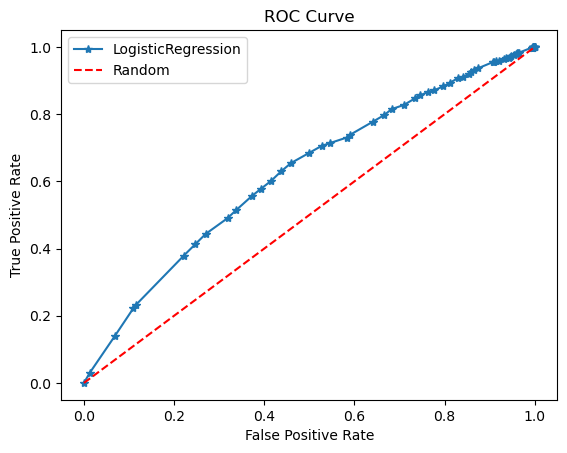

In [11]:
fpr, tpr, th  = metrics.roc_curve(y_teste, y_prob)
plt.plot(fpr,tpr, '*-')
plt.plot([0,1],[0,1], 'r--')
plt.legend(['LogisticRegression', 'Random'])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [12]:
# Limites usadaos para a construção do gráfico
th

array([1.48283424, 0.48283424, 0.4657089 , 0.44866402, 0.43173887,
       0.41497165, 0.39839907, 0.38205611, 0.36597574, 0.35018862,
       0.33472299, 0.31960443, 0.30485583, 0.29049724, 0.27654589,
       0.26301619, 0.24991974, 0.23726547, 0.22505968, 0.21330619,
       0.20200652, 0.19115998, 0.18076391, 0.17081382, 0.16130359,
       0.15222564, 0.14357114, 0.13533012, 0.12749173, 0.1200443 ,
       0.11297559, 0.10627285, 0.09992297, 0.09391264, 0.08822838,
       0.08285672, 0.07778421, 0.07299751, 0.06848351, 0.0642293 ,
       0.06022228, 0.05645017, 0.05290102, 0.0495633 , 0.04642584,
       0.0434779 , 0.04070916, 0.03810972, 0.03567008, 0.03338121,
       0.03123444, 0.02922157, 0.02733475, 0.02390992, 0.02235818,
       0.01954435, 0.01596282, 0.01491895, 0.01394238, 0.00927677,
       0.00809564, 0.00659798, 0.00575593, 0.00408963])

## Precision Recal Curve

In [13]:
precision, recall, th = metrics.precision_recall_curve(y_true=y_teste, probas_pred=y_prob)

(0.0, 1.0)

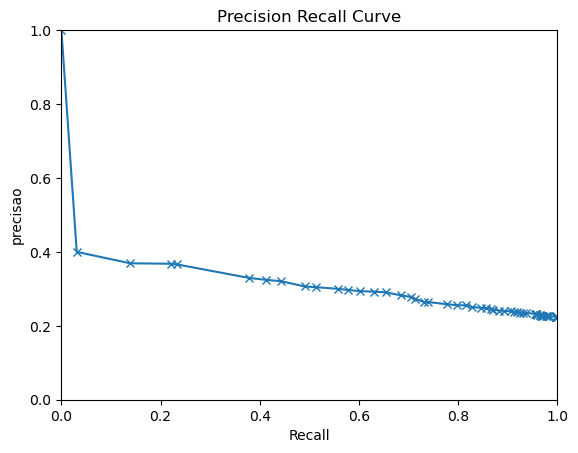

In [14]:
plt.plot(recall,precision, '-x')
plt.xlabel('Recall')
plt.ylabel('precisao')
plt.title('Precision Recall Curve')
plt.xlim([0,1])
plt.ylim([0,1])

In [15]:
# Area sob a curva precision-recall
metrics.auc(recall, precision)

# A precisão desse modelo é muito baixa.
# Enquanto a acuracia, visto á em cima é maior do que a coluna "Education"

0.3204671472474177